In [1]:
import urllib.request
from PIL import Image
from matplotlib.image import imread
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import io
from scipy.stats import mode
from scipy.spatial import distance
from sklearn.cluster import DBSCAN

In [2]:
OrangeUrl = 'https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203191222-16N8MP7K7EACDQ1EVJ7E/shot_orange_marilyn_1964-19604.png?format=750w'
with urllib.request.urlopen(OrangeUrl) as response:
    image_data = response.read()
image_bytes = io.BytesIO(image_data)
image = Image.open(image_bytes)
orange = image.convert("RGB") #gives image
orange_array = np.array(orange) #gives RGB matrix

RedUrl = 'https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203192094-MIQYNYEIJYJBY957F7T7/shot_red_marilyn_1964-19604.png?format=750w'
with urllib.request.urlopen(RedUrl) as response:
    image_data = response.read()
image_bytes = io.BytesIO(image_data)
image = Image.open(image_bytes)
red = image.convert("RGB") #gives image
red_array = np.array(red) #gives matrix

TurqUrl = 'https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652213792503-2Q9A294S9UOFEBQZQQNP/shot_turq_marilyn_1964-19604.png?format=750w'
with urllib.request.urlopen(TurqUrl) as response:
    image_data = response.read()
image_bytes = io.BytesIO(image_data)
image = Image.open(image_bytes)
turq = image.convert("RGB") #gives image
turq_array = np.array(turq) #gives matrix

BlueUrl = 'https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203207667-AHQD95AZ4Z1MCZ5B4C0N/shot_blue_marilyn_1964-19604.jpg?format=750w'
with urllib.request.urlopen(BlueUrl) as response:
    image_data = response.read()
image_bytes = io.BytesIO(image_data)
image = Image.open(image_bytes)
blue = image.convert("RGB") #gives image
blue_array = np.array(blue) #gives matrix

EggUrl = 'https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203189304-UFR2YYN9605G0IW13YHJ/shot_eggblue_marilyn_1964-19604.png?format=750w'
with urllib.request.urlopen(EggUrl) as response:
    image_data = response.read()
image_bytes = io.BytesIO(image_data)
image = Image.open(image_bytes)
egg = image.convert("RGB") #gives image
egg_array = np.array(egg) #gives matrix

In [4]:
orange_array.reshape((-1,3)).shape

(562500, 3)

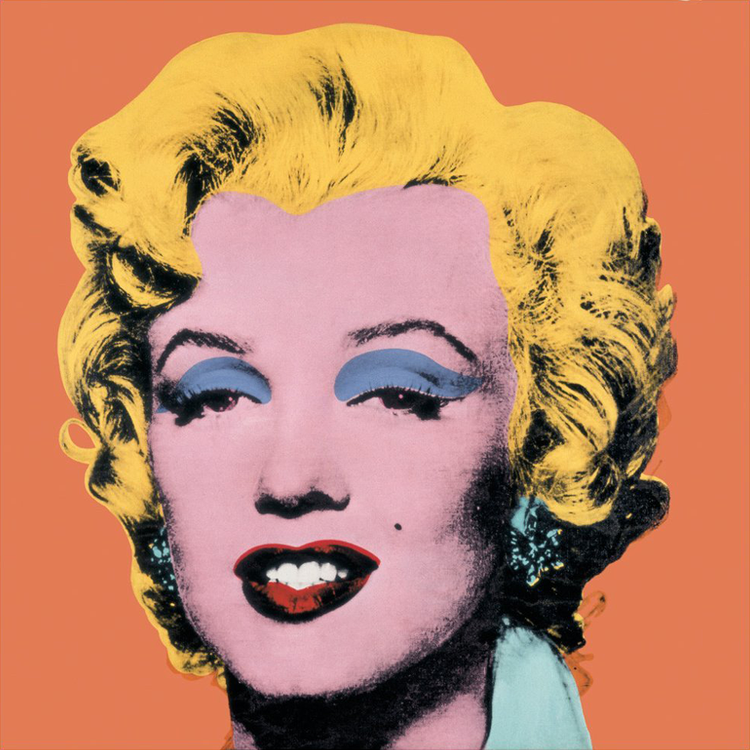

In [5]:
orange

In [6]:
yval = []
#this one for y but 1 to 751
for i in range(1,751):
  for j in range(1,751):
    yval.append(j) 
ypos = np.array(yval).reshape((-1,1))

xval = []

for i in range(1, 751):
  for j in range(1,751):
    xval.append(i)    
xpos = np.array(xval).reshape((-1,1))

In [7]:
num_bins = 32
min_value = 0
max_value = 255

edge = -1
edge_lis = [0]
num_bins = 32

for i in range(num_bins):
    edge += 8
    edge_lis.append(edge)

bin_edges = np.array(edge_lis)
bin_labels = np.array([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(num_bins)])
bin_labels = np.append(bin_labels, 251)

# Assign bin labels to the numbers
bin_indices = np.digitize(orange_array, bin_edges) - 1
orange_centered = bin_labels[bin_indices]
orange_centered.reshape((-1,3))

array([[211., 115., 107.],
       [227., 115.,  99.],
       [219., 115.,  99.],
       ...,
       [219., 123.,  67.],
       [219., 123.,  59.],
       [227., 123.,  59.]])

In [8]:
edge = -1
edge_lis = [0]
num_bins = 32

for i in range(num_bins):
    edge += 8
    edge_lis.append(edge)

bin_edges = np.array(edge_lis)
bin_labels = np.array([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(num_bins)])
bin_labels = np.append(bin_labels, 251)

# Assign bin labels to the numbers
bin_indices = np.digitize(orange_array, bin_edges) - 1
orange_centered = bin_labels[bin_indices]
orange_centered.reshape((-1,3))

array([[211., 115., 107.],
       [227., 115.,  99.],
       [219., 115.,  99.],
       ...,
       [219., 123.,  67.],
       [219., 123.,  59.],
       [227., 123.,  59.]])

In [9]:
orange_array.reshape((-1,3)).shape

(562500, 3)

/Users/jalenlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


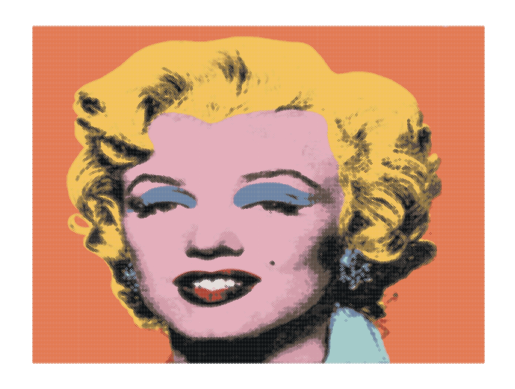

In [104]:
orangeCol = orange_array.reshape((-1,3))
orangeCentCol = orange_centered.reshape((-1,3))

k = 14# Number of clusters
initial = np.concatenate((zero, one, two, three, four, five, six, seven, eight, nine, ten,eleven , twelve, thirteen)).reshape((-1,3))
#remain = k - initial.shape[0]
#rand = np.random.randint(0, 256, remain *3).reshape((-1,3))
initial = np.concatenate((initial, rand))

kmeansCol = KMeans(n_clusters=k, init = initial)
kmeansCol.fit(orangeCentCol)
labelsCol = kmeansCol.labels_
centers = kmeansCol.cluster_centers_
labelsCol.reshape((750,750))
label_color_map = dict(zip(np.unique(labelsCol), centers/255))

for label in set(labelsCol):
    mask = labelsCol == label
    plt.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[label], label=labelsCol, s = .01)

plt.xlabel('X')
plt.ylabel('Y')
plt.axis('off')
plt.show()

In [12]:
label_color_map = dict(zip(np.unique(labelsCol), centers/255))
#label_color_map[10] = 'blue' 

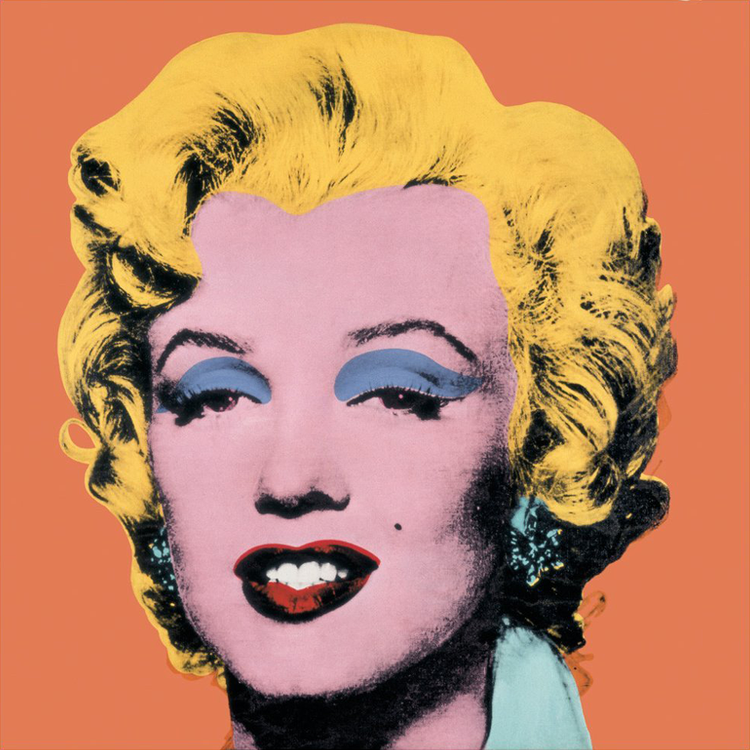

In [13]:
orange

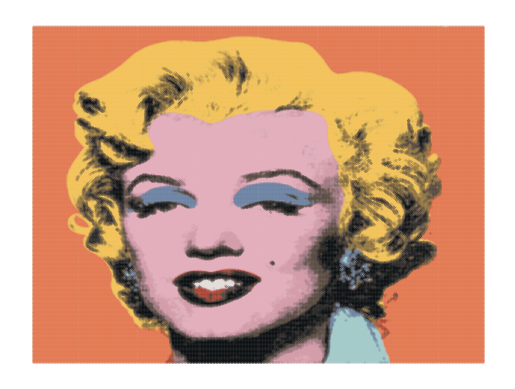

In [14]:
for label in set(labelsCol):
    mask = labelsCol == label
    plt.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[label], label=labelsCol, s = .01)

plt.xlabel('X')
plt.ylabel('Y')
plt.axis('off')
plt.show()

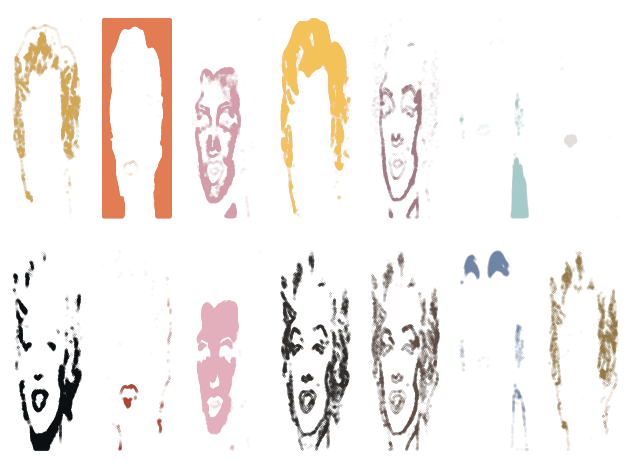

In [88]:
#This is for trying to get subplots 

fig, ax = plt.subplots(2, 7)

##### your code starts here #####

for i, ax in enumerate(ax.flatten()):
    mask = labelsCol == i
    ax.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[i], s=0.001) #for every scatterplot
    ax.axis('off')

##### your code ends here #####
plt.tight_layout()
plt.show(fig)

array([152., 122.,  64.])

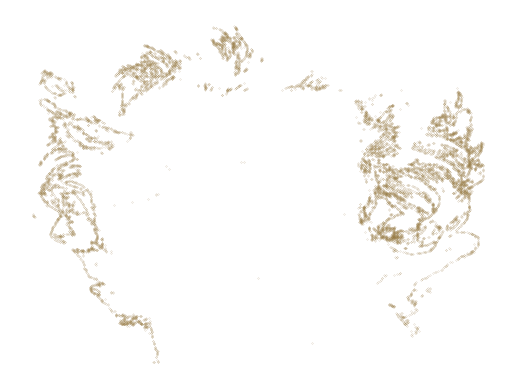

In [102]:
val = 13
mask = labelsCol == val
plt.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[val], s=0.01)
plt.axis('off')
np.round(label_color_map[val]*255)

In [83]:
zero = np.array([210., 167.,  81.]) #+
one = np.array([227., 123.,  83.]) #+
two = np.array([211., 157., 170.]) #+
three = np.array([242., 194.,  90.]) #+
four = np.array([161., 122., 132.]) #
five = np.array([164., 203., 202.]) #+
six = np.array([228., 222., 218.]) #+
seven = np.array([12., 15., 17.]) #+
eight = np.array([175.,  70.,  52.]) #+
nine = np.array([228., 175., 188.]) #- I can take this one out
ten = np.array([47., 44., 42.]) #+
eleven = np.array([93., 77., 68.]) #- I can take this one out
twelve = np.array([110., 133., 165.]) #- I can't take this one out
thirteen = np.array([149., 120.,  64.]) #- I can't take this one out



#initial = np.concatenate((zero, one, two, three, four, five, six, seven, eight, nine, ten , eleven, twelve, thirteen, fourteen, fifteen)).reshape((-1,3))
#remain = k - initial.shape[0]
#rand = np.random.randint(0, 256, remain *3).reshape((-1,3))
#initial = np.concatenate((initial, rand))

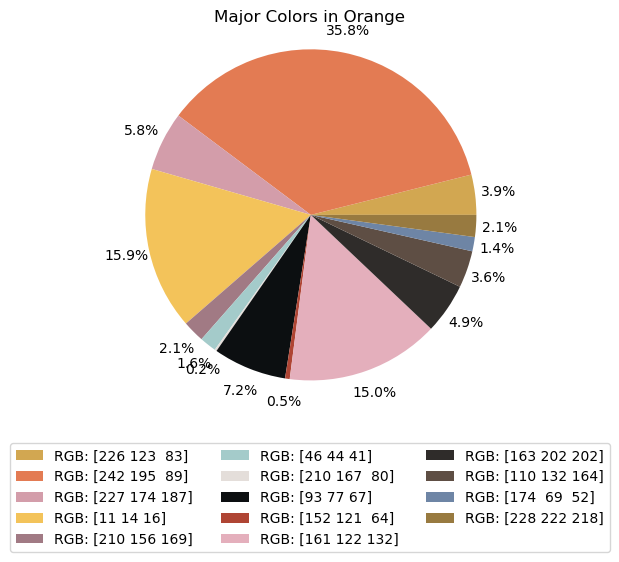

In [108]:
labelsCol
#label_color_map

counts = np.bincount(labelsCol)
counts

percentages = counts / len(labelsCol)

major_colors = centers[np.argsort(percentages)][::-1]

lis = list(label_color_map.values())
colors = [arr.tolist() for arr in lis]

labels = [f"RGB: {color.astype(int)}" for color in major_colors]
plt.pie(percentages, colors=colors, autopct="%1.1f%%", textprops={'color': 'black', 'fontsize': 10}, pctdistance=1.14)
plt.axis("equal")

  # Add labels and legend
plt.title("Major Colors in Orange", )
plt.legend(labels, loc="best")
plt.legend(labels, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)

  # Display the pie chart
plt.show()

RED

In [1245]:
num_bins = 32
min_value = 0
max_value = 255

edge = -1
edge_lis = [0]
num_bins = 32

for i in range(num_bins):
    edge += 8
    edge_lis.append(edge)

bin_edges = np.array(edge_lis)
bin_labels = np.array([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(num_bins)])
bin_labels = np.append(bin_labels, 251)

# Assign bin labels to the numbers
bin_indices = np.digitize(red_array, bin_edges) - 1
red_centered = bin_labels[bin_indices]
red_centered.reshape((-1,3))

array([[179. ,  27. ,   3.5],
       [179. ,  27. ,  11. ],
       [179. ,  27. ,   3.5],
       ...,
       [171. ,  35. ,   3.5],
       [171. ,  35. ,   3.5],
       [163. ,  35. ,   3.5]])

In [1246]:
zero = np.array([91., 72., 36.])#+
one = np.array([230., 175., 191.]) #+
two = np.array([225., 202.,  10.]) #+
three = np.array([186.,  21.,   4.]) #+
four = np.array([13.,  9.,  7.]) #+
five = np.array([139., 198., 202.]) #-
six = np.array([111., 194., 166.]) #+
seven = np.array([180., 134., 139.]) #-
eight = np.array([232., 228., 209.]) #-
nine = np.array([174., 149.,  24.]) #-

/Users/madelynjoe/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


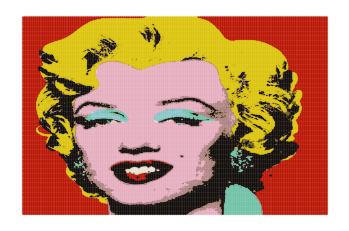

In [1247]:
redCol = red_array.reshape((-1,3))
redCentCol = red_centered.reshape((-1,3))

k = 9# Number of clusters
initial = np.concatenate((zero,one, two, three, four, five, six, seven, eight)).reshape((-1,3))
#remain = k - initial.shape[0]
#rand = np.random.randint(0, 256, remain *3).reshape((-1,3))
#initial = np.concatenate((initial, rand))

kmeansCol = KMeans(n_clusters=k, init = initial)
kmeansCol.fit(redCentCol)
labelsCol = kmeansCol.labels_
centers = kmeansCol.cluster_centers_
labelsCol.reshape((750,750))
label_color_map = dict(zip(np.unique(labelsCol), centers/255))

for label in set(labelsCol):
    mask = labelsCol == label
    plt.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[label], label=labelsCol, s = .01)

plt.xlabel('X')
plt.ylabel('Y')
plt.axis('off')
plt.show()

array([232., 228., 209.])

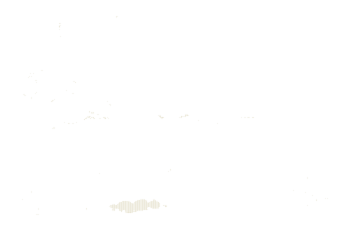

In [1248]:
val = 8
mask = labelsCol == val
plt.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[val], s=0.01)
plt.axis('off')
np.round(label_color_map[val]*255)

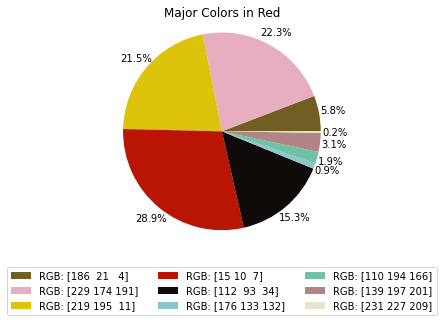

In [1249]:
labelsCol
#label_color_map

counts = np.bincount(labelsCol)
counts

percentages = counts / len(labelsCol)

major_colors = centers[np.argsort(percentages)][::-1]

lis = list(label_color_map.values())
colors = [arr.tolist() for arr in lis]

labels = [f"RGB: {color.astype(int)}" for color in major_colors]
plt.pie(percentages, colors=colors, autopct="%1.1f%%", textprops={'color': 'black', 'fontsize': 10}, pctdistance=1.14)
plt.axis("equal")

  # Add labels and legend
plt.title("Major Colors in Red", )
plt.legend(labels, loc="best")
plt.legend(labels, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)

  # Display the pie chart
plt.show()

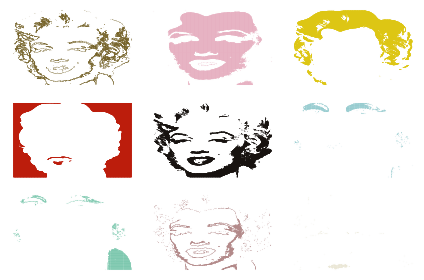

In [1250]:
#This is for trying to get subplots 

fig, ax = plt.subplots(3, 3)

##### your code starts here #####

for i, ax in enumerate(ax.flatten()):
    mask = labelsCol == i
    ax.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[i], s=0.001) #for every scatterplot
    ax.axis('off')

##### your code ends here #####
plt.tight_layout()
plt.show(fig)

TURQ

In [1251]:
num_bins = 32
min_value = 0
max_value = 255

edge = -1
edge_lis = [0]
num_bins = 32

for i in range(num_bins):
    edge += 8
    edge_lis.append(edge)

bin_edges = np.array(edge_lis)
bin_labels = np.array([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(num_bins)])
bin_labels = np.append(bin_labels, 251)

# Assign bin labels to the numbers
bin_indices = np.digitize(turq_array, bin_edges) - 1
turq_centered = bin_labels[bin_indices]
turq_centered.reshape((-1,3))

array([[ 99. , 195. , 195. ],
       [ 91. , 195. , 195. ],
       [ 91. , 195. , 187. ],
       ...,
       [  3.5, 163. , 163. ],
       [  3.5, 163. , 163. ],
       [  3.5, 163. , 163. ]])

In [1252]:
zero = np.array([41., 42., 41.]) #+
one = np.array([249., 214., 211.]) #+
two = np.array([177., 161., 141.]) #+
three = np.array([250., 233.,  93.]) #+
four = np.array([203., 173.,  68.]) #+
five = np.array([ 67., 187., 194.]) #+
six = np.array([126., 118., 102.]) #+
seven = np.array([249., 219.,  55.]) #+
eight = np.array([225., 187., 175.]) #+
nine = np.array([219., 230., 233.]) #+
ten = np.array([145., 123.,  50.]) #+
eleven = np.array([79., 77., 61.]) #+
twelve = np.array([164.,  67.,  54.]) #+

/Users/madelynjoe/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


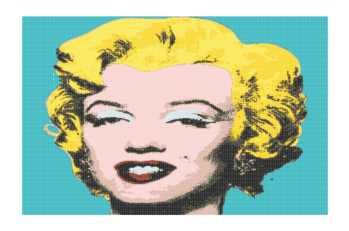

In [1253]:
turqCol = turq_array.reshape((-1,3))
turqCentCol = turq_centered.reshape((-1,3))

k = 13 # Number of clusters
initial = np.concatenate((zero, one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve)).reshape((-1,3))
#remain = k - initial.shape[0]
#rand = np.random.randint(0, 256, remain *3).reshape((-1,3))
#initial = np.concatenate((initial, rand))

kmeansCol = KMeans(n_clusters=k, init = initial)
kmeansCol.fit(turqCentCol)
labelsCol = kmeansCol.labels_
centers = kmeansCol.cluster_centers_
labelsCol.reshape((750,750))
label_color_map = dict(zip(np.unique(labelsCol), centers/255))

for label in set(labelsCol):
    mask = labelsCol == label
    plt.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[label], label=labelsCol, s = .01)

plt.xlabel('X')
plt.ylabel('Y')
plt.axis('off')
plt.show()

array([164.,  67.,  54.])

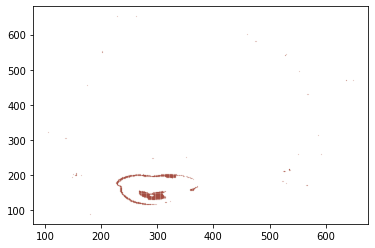

In [1254]:
val = 12
mask = labelsCol == val
plt.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[val], s=0.01)
#plt.axis('off')
np.round(label_color_map[val]*255)

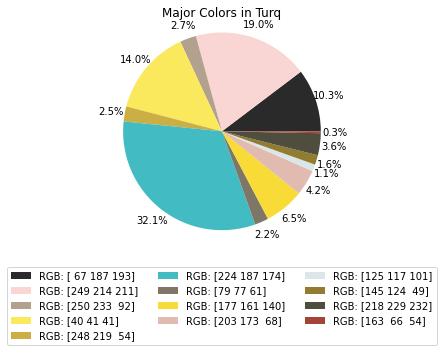

In [1255]:
labelsCol
#label_color_map

counts = np.bincount(labelsCol)
counts

percentages = counts / len(labelsCol)

major_colors = centers[np.argsort(percentages)][::-1]

lis = list(label_color_map.values())
colors = [arr.tolist() for arr in lis]

labels = [f"RGB: {color.astype(int)}" for color in major_colors]
plt.pie(percentages, colors=colors, autopct="%1.1f%%", textprops={'color': 'black', 'fontsize': 10}, pctdistance=1.14)
plt.axis("equal")

  # Add labels and legend
plt.title("Major Colors in Turq", )
plt.legend(labels, loc="best")
plt.legend(labels, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)

  # Display the pie chart
plt.show()

KeyError: 13

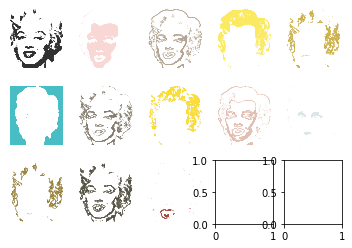

In [1256]:
#This is for trying to get subplots 

fig, ax = plt.subplots(3, 5)

##### your code starts here #####

for i, ax in enumerate(ax.flatten()):
    mask = labelsCol == i
    ax.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[i], s=0.001) #for every scatterplot
    ax.axis('off')

##### your code ends here #####
plt.tight_layout()
plt.show(fig)

In [ ]:
turq

BLUE

In [130]:
num_bins = 32
min_value = 0
max_value = 255

edge = -1
edge_lis = [0]
num_bins = 32

for i in range(num_bins):
    edge += 8
    edge_lis.append(edge)

bin_edges = np.array(edge_lis)
bin_labels = np.array([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(num_bins)])
bin_labels = np.append(bin_labels, 251)

# Assign bin labels to the numbers
bin_indices = np.digitize(blue_array, bin_edges) - 1
blue_centered = bin_labels[bin_indices]
blue_centered.reshape((-1,3))

array([[ 83., 139., 203.],
       [ 83., 139., 203.],
       [ 83., 139., 203.],
       ...,
       [ 83., 139., 203.],
       [ 83., 139., 203.],
       [ 83., 139., 203.]])

In [135]:

zero = np.array([ 83., 139., 203.]) #+
one = np.array([217., 152., 168.]) #+
two = np.array([230., 183.,  87.]) #+
three = np.array([181., 125., 135.]) #eh another face shade pink
four = np.array([112., 156., 169.]) #+
five = np.array([182., 130.,  66.]) #- yellow for hair
six = np.array([114.,  88.,  93.]) #- eh black shades for face
seven = np.array([248., 210., 109.]) #+ 
eight = np.array([230., 210., 184.]) #+
nine = np.array([61., 37., 35.]) #- #black shading face
ten = np.array([121.,  70.,  33.]) #- brown hair shading might be useful tho
eleven = np.array([18., 12., 14.]) #+ #face shading
twelve = np.array([157.,  38.,  41.]) #+

/Users/jalenlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


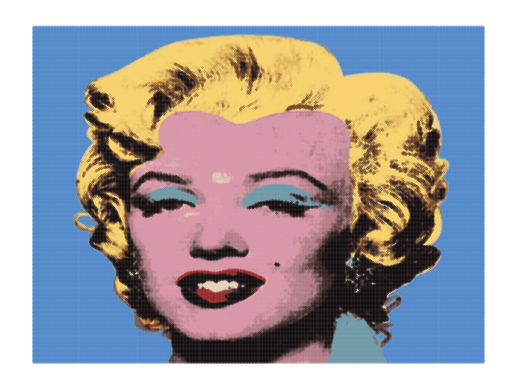

In [136]:
blueCol = blue_array.reshape((-1,3))
blueCentCol = blue_centered.reshape((-1,3))

k = 13 # Number of clusters
initial = np.concatenate((zero, one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve)).reshape((-1,3))
#remain = k - initial.shape[0]
#rand = np.random.randint(0, 256, remain *3).reshape((-1,3))
#initial = np.concatenate((initial, rand))

kmeansCol = KMeans(n_clusters=k, init = initial)
kmeansCol.fit(blueCentCol)
labelsCol = kmeansCol.labels_
centers = kmeansCol.cluster_centers_
labelsCol.reshape((750,750))
label_color_map = dict(zip(np.unique(labelsCol), centers/255))

for label in set(labelsCol):
    mask = labelsCol == label
    plt.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[label], label=labelsCol, s = .01)

plt.xlabel('X')
plt.ylabel('Y')
plt.axis('off')
plt.show()

array([248., 210., 109.])

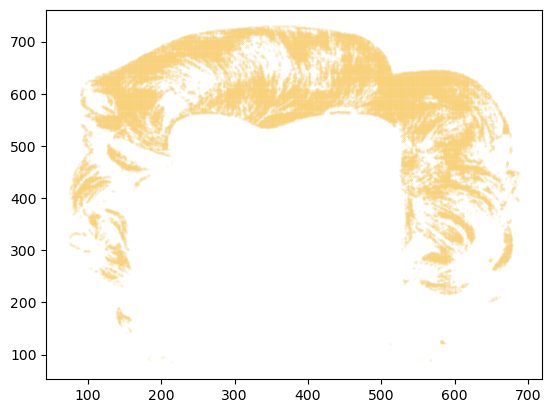

In [133]:
val = 0
mask = labelsCol == val
plt.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[val], s=0.01)
#plt.axis('off')
np.round(label_color_map[val]*255)

KeyError: 13

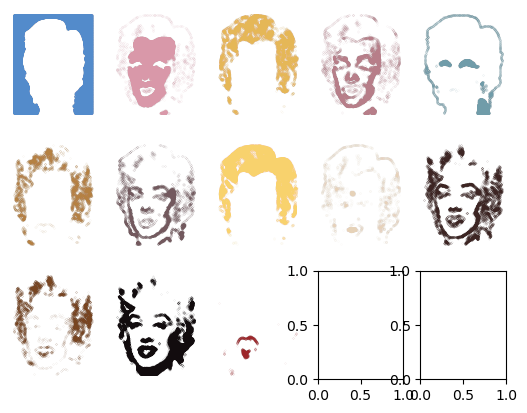

In [139]:

fig, ax = plt.subplots(3, 5)

##### your code starts here #####

for i, ax in enumerate(ax.flatten()):
    mask = labelsCol == i
    ax.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[i], s=0.001) #for every scatterplot
    ax.axis('off')

##### your code ends here #####
plt.tight_layout()
plt.show(fig)

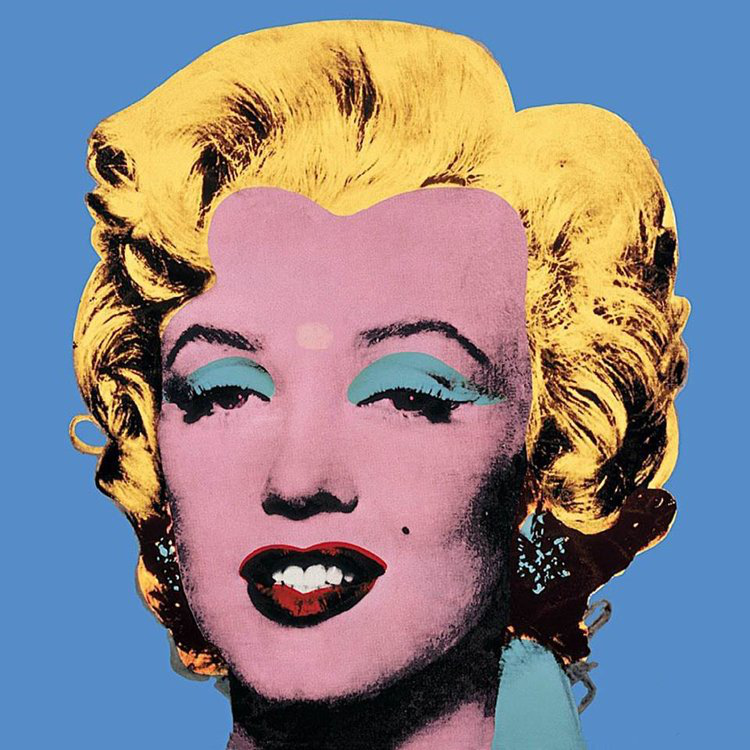

In [134]:
blue

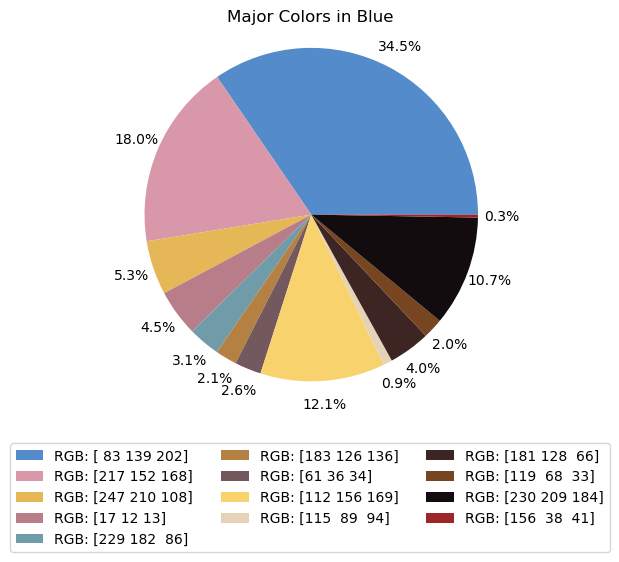

In [137]:
labelsCol
#label_color_map

counts = np.bincount(labelsCol)
counts

percentages = counts / len(labelsCol)

major_colors = centers[np.argsort(percentages)][::-1]

lis = list(label_color_map.values())
colors = [arr.tolist() for arr in lis]

labels = [f"RGB: {color.astype(int)}" for color in major_colors]
plt.pie(percentages, colors=colors, autopct="%1.1f%%", textprops={'color': 'black', 'fontsize': 10}, pctdistance=1.14)
plt.axis("equal")

  # Add labels and legend
plt.title("Major Colors in Blue", )
plt.legend(labels, loc="best")
plt.legend(labels, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)

  # Display the pie chart
plt.show()

KeyError: 13

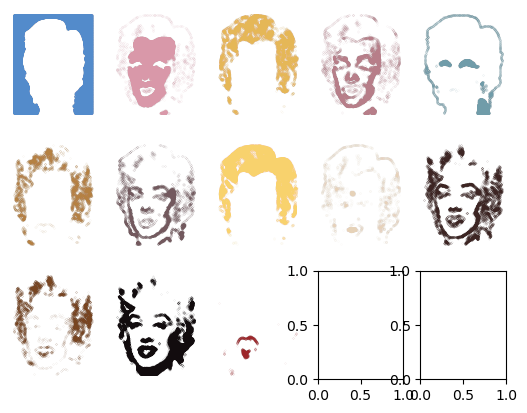

In [138]:
#This is for trying to get subplots 

fig, ax = plt.subplots(3, 5)

##### your code starts here #####

for i, ax in enumerate(ax.flatten()):
    mask = labelsCol == i
    ax.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[i], s=0.001) #for every scatterplot
    ax.axis('off')

##### your code ends here #####
plt.tight_layout()
plt.show(fig)

EGG

In [112]:
num_bins = 32
min_value = 0
max_value = 255

edge = -1
edge_lis = [0]
num_bins = 32

for i in range(num_bins):
    edge += 8
    edge_lis.append(edge)

bin_edges = np.array(edge_lis)
bin_labels = np.array([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(num_bins)])
bin_labels = np.append(bin_labels, 251)

# Assign bin labels to the numbers
bin_indices = np.digitize(egg_array, bin_edges) - 1
egg_centered = bin_labels[bin_indices]
egg_centered.reshape((-1,3))

array([[147., 179., 171.],
       [155., 187., 171.],
       [147., 187., 171.],
       ...,
       [155., 187., 179.],
       [155., 187., 179.],
       [155., 195., 179.]])

In [113]:
zero = np.array([98., 85., 64.]) #+
one = np.array([213., 180.,  70.]) #+
two = np.array([213., 144., 150.]) #+
three = np.array([147., 176., 175.]) #+
four = np.array([161., 202., 193.]) #+
five = np.array([160.,  52.,  36.]) #+
six = np.array([52., 47., 41.]) #+
seven = np.array([168., 120., 123.]) #+
eight = np.array([163., 140.,  61.]) #+
nine = np.array([209., 210., 198.]) #+
ten = np.array([115., 160., 146.]) #+

/Users/jalenlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


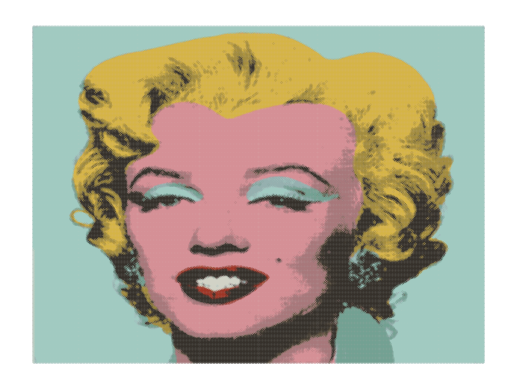

In [114]:
eggCol = egg_array.reshape((-1,3))
eggCentCol = egg_centered.reshape((-1,3))

k = 11 # Number of clusters
initial = np.concatenate((zero, one, two, three, four, five, six, seven, eight, nine, ten)).reshape((-1,3))
#remain = k - initial.shape[0]
#rand = np.random.randint(0, 256, remain *3).reshape((-1,3))
#initial = np.concatenate((initial, rand))

kmeansCol = KMeans(n_clusters=k, init = initial)
kmeansCol.fit(eggCentCol)
labelsCol = kmeansCol.labels_
centers = kmeansCol.cluster_centers_
labelsCol.reshape((750,750))
label_color_map = dict(zip(np.unique(labelsCol), centers/255))

for label in set(labelsCol):
    mask = labelsCol == label
    plt.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[label], label=labelsCol, s = .01)

plt.xlabel('X')
plt.ylabel('Y')
plt.axis('off')
plt.show()

array([98., 85., 64.])

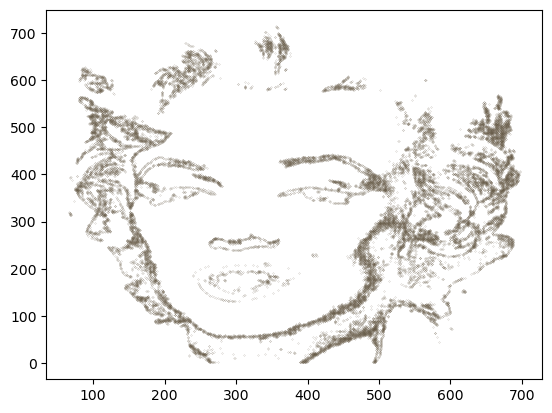

In [127]:
val = 0
mask = labelsCol == val
plt.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[val], s=0.01)
#plt.axis('off')
np.round(label_color_map[val]*255)

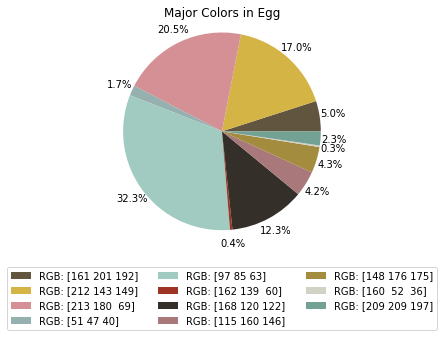

In [1267]:
labelsCol
#label_color_map

counts = np.bincount(labelsCol)
counts

percentages = counts / len(labelsCol)

major_colors = centers[np.argsort(percentages)][::-1]

lis = list(label_color_map.values())
colors = [arr.tolist() for arr in lis]

labels = [f"RGB: {color.astype(int)}" for color in major_colors]
plt.pie(percentages, colors=colors, autopct="%1.1f%%", textprops={'color': 'black', 'fontsize': 10}, pctdistance=1.14)
plt.axis("equal")

  # Add labels and legend
plt.title("Major Colors in Egg", )
plt.legend(labels, loc="best")
plt.legend(labels, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)

  # Display the pie chart
plt.show()

KeyError: 11

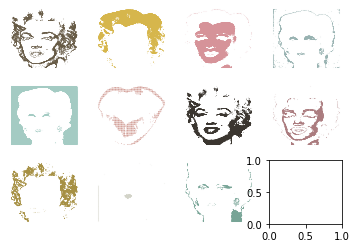

In [1268]:
#This is for trying to get subplots 

fig, ax = plt.subplots(3, 4)

##### your code starts here #####

for i, ax in enumerate(ax.flatten()):
    mask = labelsCol == i
    ax.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[i], s=0.001) #for every scatterplot
    ax.axis('off')

##### your code ends here #####
plt.tight_layout()
plt.show(fig)

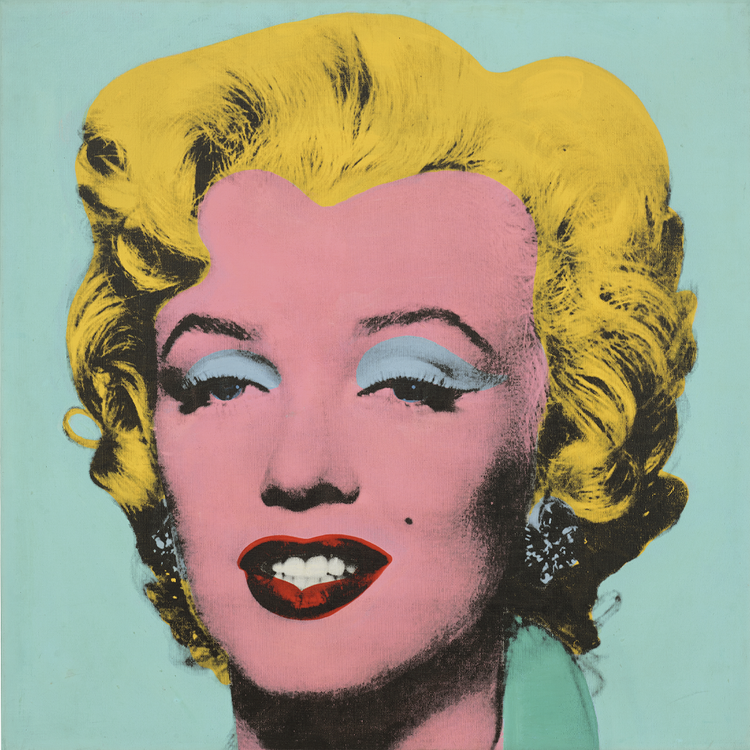

In [128]:
egg